# Heart Disease Prediction using Neural Networks

This project for on predicting heart disease using neural networks. Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, patients will be classified .

---
Done by :
*ELMAHFOUD Radouane* -

---


# **Content**

1. [Importing the Dataset](#1.)
1. [Create Training and Testing Datasets](#2.)
1. [Building and Training the Neural Network](#3.)
1. [Results and Metrics](#4.)
1. [Improve the Model](#5.)

In [1]:
import pandas as pd
import numpy as np
import sklearn
import keras

In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

<a class="anchor" id="1."></a> 
# 1.Importing the Dataset

The dataset is available through the University of California, Irvine Machine learning repository. Here is the URL:

http:////archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes - so we will do the same. More specifically, we will use the data collected at the Cleveland Clinic Foundation.

To import the necessary data, we will use pandas' built in read_csv() function. Let's get started!

In [3]:
# read the csv
data = pd.read_csv('HD_Complete_Data.csv',sep=';')

In [4]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(918, 12)
Age                 int64
Sexe               object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


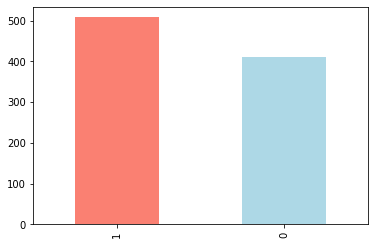

In [5]:
# lets visualize the target variable
data.HeartDisease.value_counts().plot(kind="bar",color=["salmon","lightblue"])
plt.show()

* Imbalanced dataset

In [6]:
replace_map = {'M': 1, 'F': 0}
data['Sexe'] = data['Sexe'].replace(replace_map)

In [7]:
replace_map = {'ATA': 4,'NAP': 3,'NAP':2,'TA':1,'ASY':0}
data['ChestPainType'] = data['ChestPainType'].replace(replace_map)

In [8]:
replace_map = {'Y':1,'N':0}
data['ExerciseAngina'] = data['ExerciseAngina'].replace(replace_map)

In [9]:
replace_map = {'Up':2,'Flat':1,'Down':0}
data['ST_Slope'] = data['ST_Slope'].replace(replace_map)

In [10]:
replace_map = {'LVH':2,'Normal':1,'ST':0}
data['RestingECG'] = data['RestingECG'].replace(replace_map)

In [11]:
data.dtypes

Age                 int64
Sexe                int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [12]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.246187,132.396514,198.799564,0.233115,1.010893,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,1.549039,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [13]:
data.HeartDisease.unique()

array([0, 1], dtype=int64)

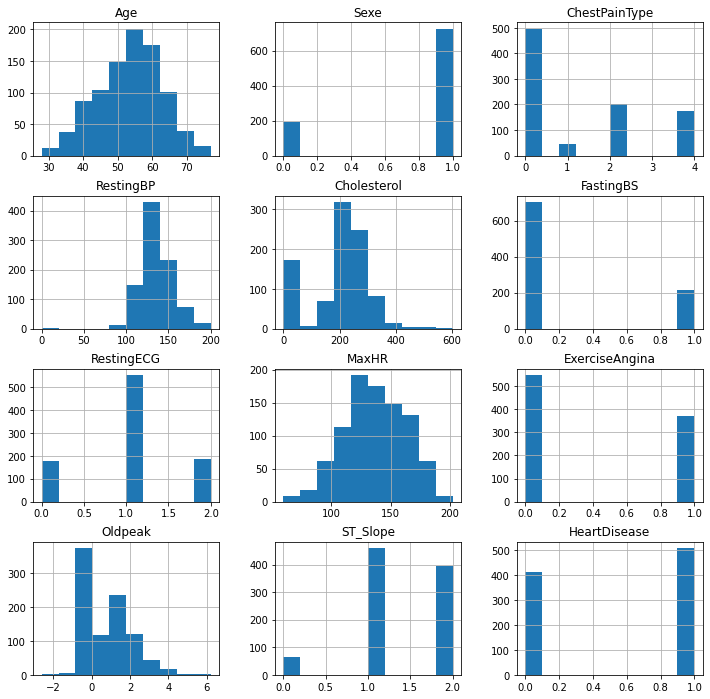

In [14]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

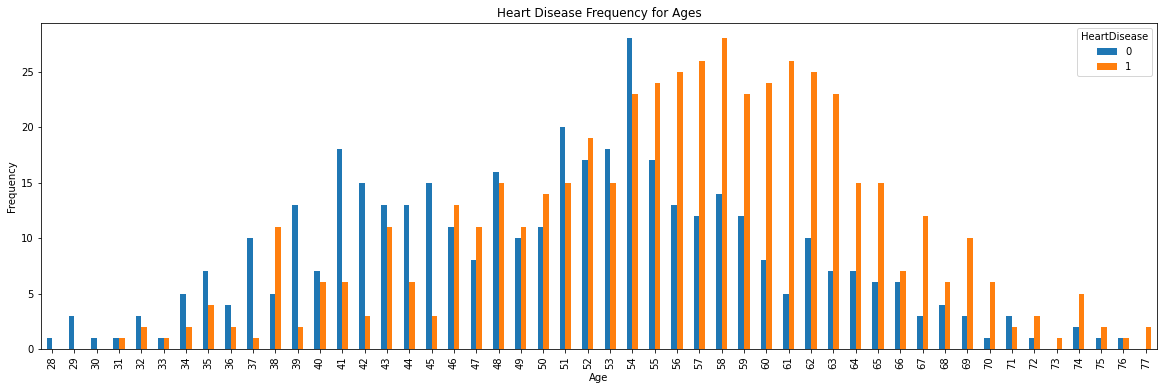

In [15]:
pd.crosstab(data.Age,data.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

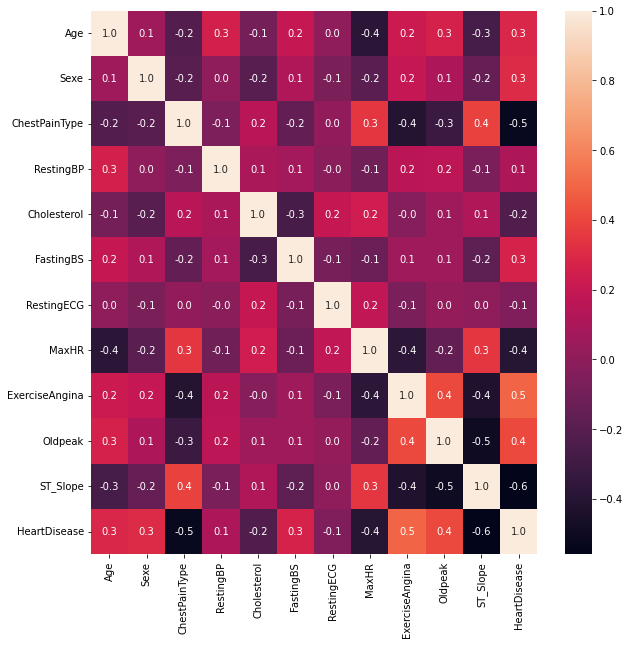

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

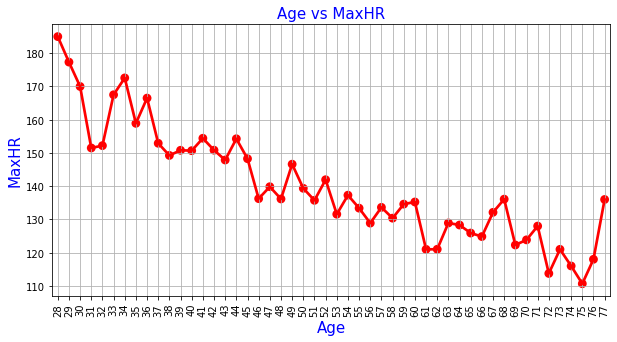

In [17]:
age_unique=sorted(data.Age.unique())
age_thalach_values=data.groupby('Age')['MaxHR'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['Age']==age].MaxHR)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('MaxHR',fontsize = 15,color='blue')
plt.title('Age vs MaxHR',fontsize = 15,color='blue')
plt.grid()
plt.show()

<a class="anchor" id="2."></a> 
# 2.Create Training and Testing Datasets

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data). 


In [18]:
X = np.array(data.drop(['HeartDisease'], 1))
y = np.array(data['HeartDisease'])

C:\Users\user\AppData\Local\Temp\ipykernel_13856\2028171583.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['HeartDisease'], 1))


In [19]:
X[0]

array([ 40.,   1.,   4., 140., 289.,   0.,   1., 172.,   0.,   0.,   2.])

In [20]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [21]:
X[0]

array([-1.4331398 ,  0.51595242,  1.77872453,  0.41090889,  0.82507026,
       -0.55134134, -0.01725451,  1.38292822, -0.8235563 , -0.83243239,
        1.05211381])

In [22]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [23]:
print (y_train.shape)
print (y_train[:10])

(734,)
[1 0 1 1 1 0 1 0 0 0]


In [24]:
X_train[0]

array([ 1.00653719,  0.51595242,  1.77872453,  0.35686672,  0.16648077,
        1.81375843, -1.60121899, -0.34619225,  1.21424608,  0.29328271,
       -0.59607813])

<a class="anchor" id="3."></a> 
# 3.Building and Training the Neural Network

Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [25]:
X_train.shape

(734, 11)

In [26]:
'''from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from tensorflow.keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=11, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid')) 
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])  # Changed for binary classification
    return model

model = create_model()

print(model.summary())'''


"from keras.models import Sequential\nfrom keras.layers import Dense, Dropout\nfrom keras import regularizers\nfrom tensorflow.keras.optimizers import Adam\n\n# define a function to build the keras model\ndef create_model():\n    # create model\n    model = Sequential()\n    model.add(Dense(16, input_dim=11, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))\n    model.add(Dropout(0.25))\n    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))\n    model.add(Dropout(0.25))\n    model.add(Dense(1, activation='sigmoid')) \n    \n    # compile model\n    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])  # Changed for binary classification\n    return model\n\nmodel = create_model()\n\nprint(model.summary())"

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

#Creating a pipeline
model = Sequential()

#1st hidden layer with input layer
model.add(Dense(units=145,activation="relu",input_dim=11))

#2nd hidden layer
model.add(Dense(units=120,activation="relu",))

#3rd hidden layer
model.add(Dense(units=70,activation="relu",))
#output layer
model.add(Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 145)               1740      
                                                                 
 dense_1 (Dense)             (None, 120)               17520     
                                                                 
 dense_2 (Dense)             (None, 70)                8470      
                                                                 
 dense_3 (Dense)             (None, 1)                 71        
                                                                 
Total params: 27,801
Trainable params: 27,801
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model_his=model.fit(X_train,y_train,validation_split=0.30, batch_size=55,epochs=25,verbose=1)

Epoch 1/25
10/10 [==============================] - 1s 22ms/step - loss: 0.5938 - accuracy: 0.7096 - val_loss: 0.5237 - val_accuracy: 0.7828
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.4027 - accuracy: 0.8577 - val_loss: 0.4659 - val_accuracy: 0.8054
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.3110 - accuracy: 0.8694 - val_loss: 0.4887 - val_accuracy: 0.8054
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2932 - accuracy: 0.8772 - val_loss: 0.4992 - val_accuracy: 0.8054
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2778 - accuracy: 0.8850 - val_loss: 0.4731 - val_accuracy: 0.8145
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2639 - accuracy: 0.8889 - val_loss: 0.4591 - val_accuracy: 0.8100
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2532 - accuracy: 0.8986 - val_loss: 0.4558 - val_accuracy: 0.8235
Epoch 8/25
10/10 [=

In [29]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.45)

<a class="anchor" id="5."></a> 
# 4.Results and Metrics

In [30]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.8315217391304348


In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65 17]
 [14 88]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        82
           1       0.84      0.86      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



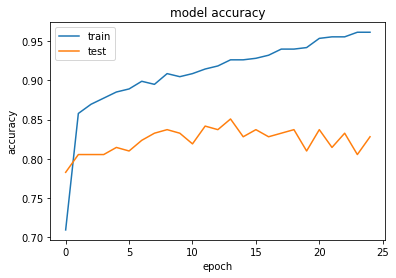

In [33]:
# summarize history for accuracy
plt.plot(model_his.history['accuracy'])
plt.plot(model_his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


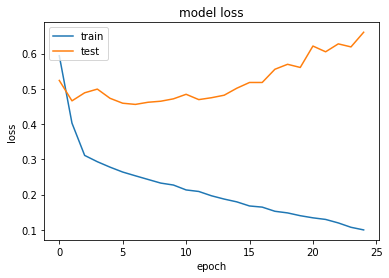

In [34]:
# summarize history for loss
plt.plot(model_his.history['loss'])
plt.plot(model_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<a class="anchor" id="5."></a> 
# 5.Improve the Model

In [35]:
# Grid Search for Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def build_model(optimizer='adam', activation='relu'):
    # Build the model
    model = Sequential()
    model.add(Dense(60, input_dim=11, activation=activation))  # Changed input_dim to 11
    model.add(Dense(30, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=build_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [10, 50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh']
}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\user\AppData\Local\Temp\ipykernel_13856\2970687765.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, verbose=0)


Best: 0.862351 using {'activation': 'relu', 'batch_size': 20, 'epochs': 10, 'optimizer': 'rmsprop'}


In [36]:
from keras.callbacks import EarlyStopping

Best Parameters: {'activation': 'relu', 'batch_size': 20, 'epochs': 10, 'optimizer': 'rmsprop'}
Epoch 1/10
30/30 [==============================] - 1s 7ms/step - loss: 0.5095 - accuracy: 0.7922 - val_loss: 0.4706 - val_accuracy: 0.8163
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.8552 - val_loss: 0.4311 - val_accuracy: 0.8435
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8654 - val_loss: 0.4283 - val_accuracy: 0.8503
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8705 - val_loss: 0.4300 - val_accuracy: 0.8503
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8739 - val_loss: 0.4310 - val_accuracy: 0.8299
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8750


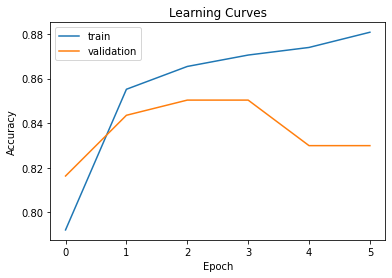

Training accuracy:  0.8807495832443237
Validation accuracy:  0.8299319744110107
Test accuracy:  0.875


In [37]:
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Extracting the best parameters
best_activation = best_params['activation']
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']

# Rebuild and compile the model with the best parameters
def build_best_model():
    model = Sequential()
    model.add(Dense(60, input_dim=11, activation=best_activation))
    model.add(Dense(30, activation=best_activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=best_optimizer, metrics=['accuracy'])
    return model

model = build_best_model()

# Implement Early Stopping
early_stopping_monitor = EarlyStopping(patience=3)

# Train the model with the best parameters
history = model.fit(X_train, y_train, validation_split=0.2, epochs=best_epochs, batch_size=best_batch_size, callbacks=[early_stopping_monitor])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Plot Learning Curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Learning Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Output the performance
print("Training accuracy: ", history.history['accuracy'][-1])
print("Validation accuracy: ", history.history['val_accuracy'][-1])
print("Test accuracy: ", test_acc)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        82
           1       0.87      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



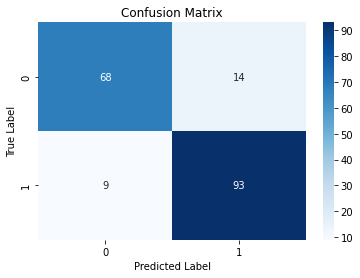

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
predictions = model.predict(X_test) > 0.5  # Change this threshold if necessary

# Convert predictions and y_test to 1D array if they are not
predictions = predictions.ravel()
y_test_1d = y_test.ravel()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_1d, predictions))

# Confusion Matrix
conf_mat = confusion_matrix(y_test_1d, predictions)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


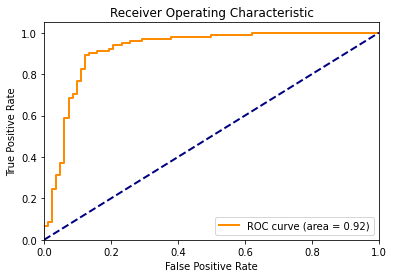

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
pred_probabilities = model.predict(X_test).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_1d, pred_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



         END